# Titanic 

**pclass** Ticket class (1=1st; 2=2nd; 3=3rd)    
**sex** Sex (male,female)  
**age** Age in years  
**sibsp** Number of siblings / spouses aboard  
**parch** Number of parents / children aboard  
**ticket** Ticket number  
**fare** Passenger fare  
**cabin** Cabin number    
**embarked** Port of Embarkation (C;Q;S)    
**Survival** 0 = No; 1 =Yes    

## Overview

1\) Understanding the data  
2\) Data Cleaning  
3\) Data Exploration  
4\) Data Processing  
5\) Modeling  
6\) Model Evaluation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


sns.set_style("darkgrid")

## Understading the data

- **describe**
- **info**
- **plots**

In [2]:
train=pd.read_csv('content/train.csv')
test=pd.read_csv('content/test.csv')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# colunas categóricas e numéricas
NUM = ['Age','SibSp','Parch','Fare']
CAT=['Survived','Pclass','Sex','Ticket','Cabin','Embarked']

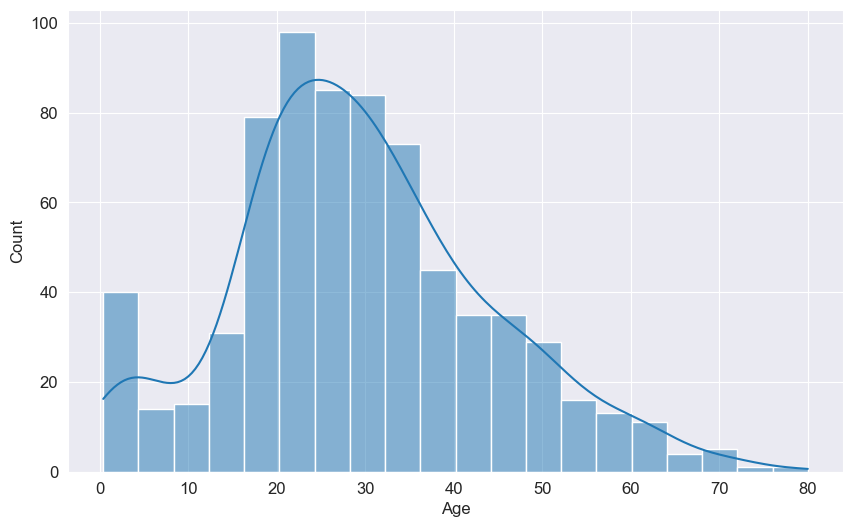

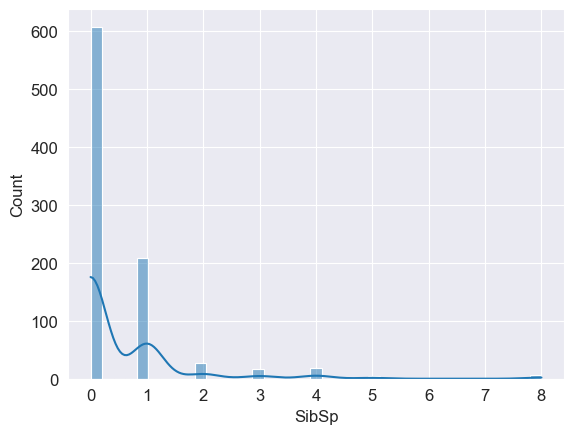

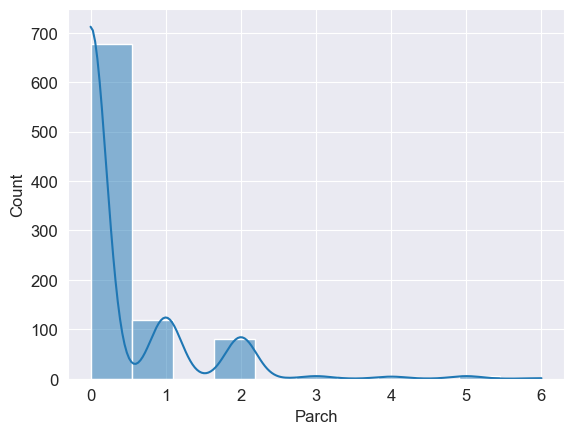

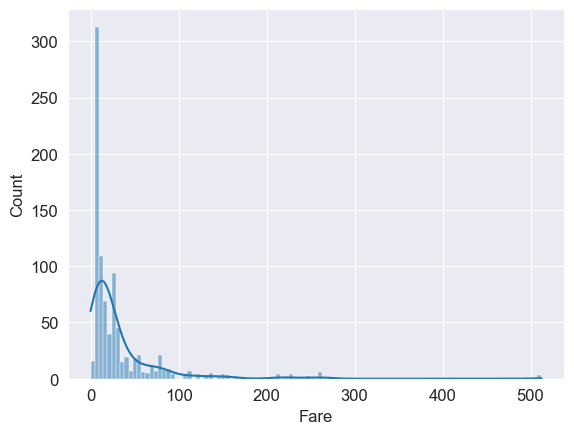

In [6]:
plt.figure(figsize=(10,6))
plt.rc('font', size=12)

for col in NUM:
    sns.histplot(train,x=col,kde=True)
    plt.show()

<Axes: >

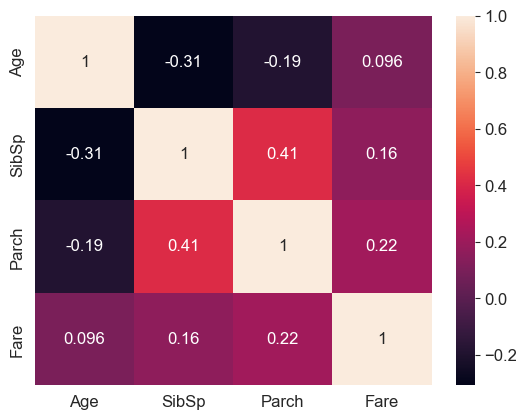

In [7]:
sns.heatmap(train[NUM].corr(),annot=True)

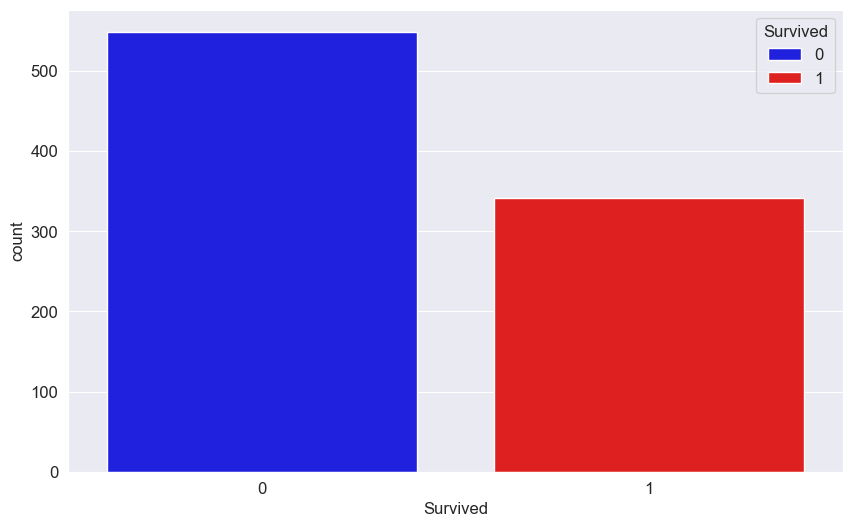

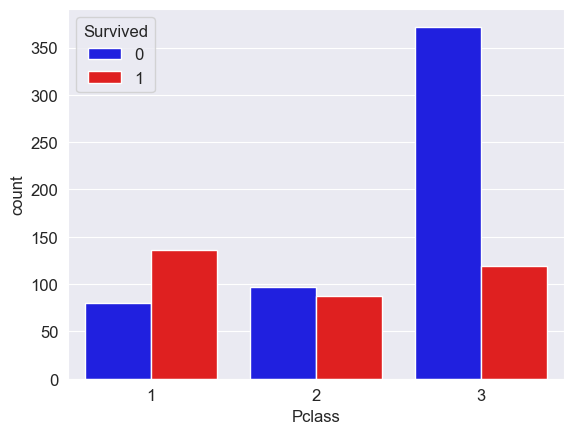

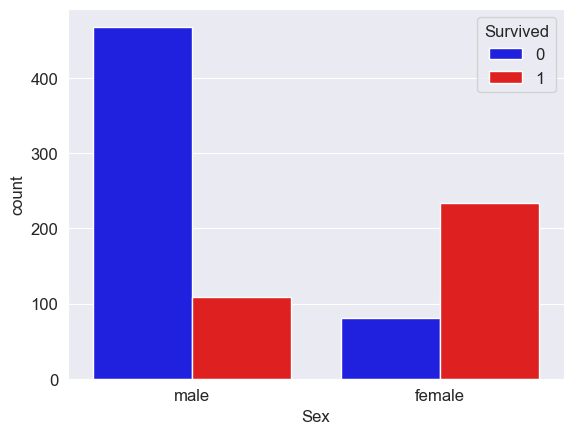

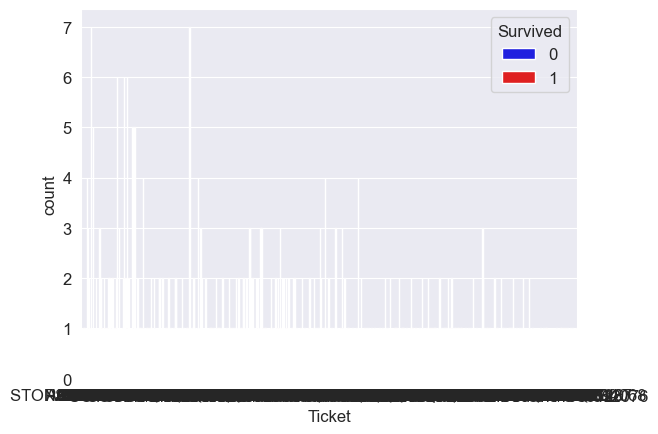

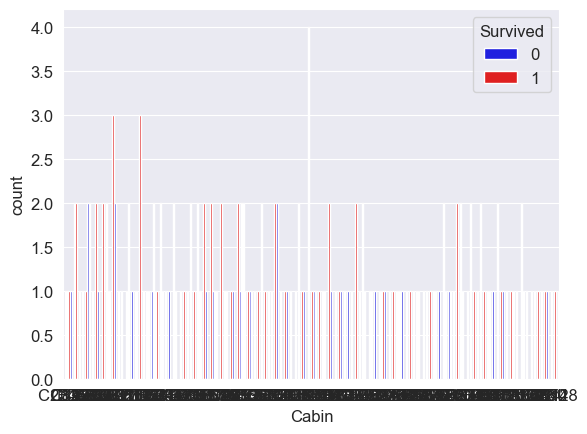

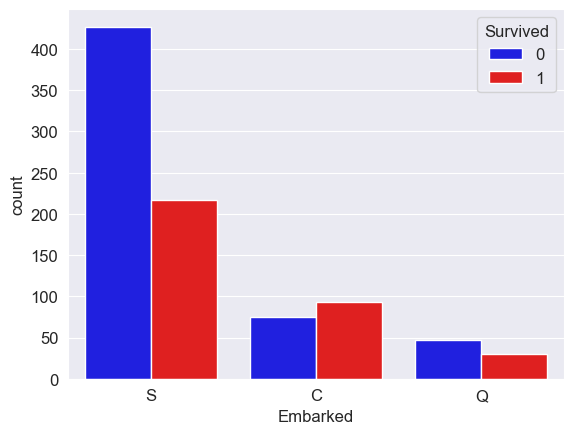

In [8]:
plt.figure(figsize=(10,6))
plt.rc('font', size=12)

for col in CAT:
    sns.countplot(train,x=col,hue="Survived",palette=['blue','red'])
    plt.show()

In [9]:
# #survival rate across different tyicket types 
# pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

In [10]:
# #difference in numeric vs non-numeric tickets in survival rate ac
# pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

In [11]:
# #comparing surivial rate by cabin
# print(training.cabin_adv.value_counts())
# pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

In [12]:
# pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Age' ,aggfunc ='count')

In [13]:
# # Comparing survival and each of these categorical variables 
# print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
# print()
# print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
# print()
# print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

In [14]:
# # compare survival rate across Age, SibSp, Parch, and Fare 
# pd.pivot_table(training, index = 'Survived',values = ['Age','SibSp','Parch','Fare'])

In [15]:
train.pivot_table(index='Survived',values='Age',columns='Pclass')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [16]:
train.pivot_table(index='Survived',values='Fare',columns='Pclass')

Pclass,1,2,3
Survived,,,
0,64.684007,19.412328,13.669364
1,95.608029,22.055700,13.694887


## Data Processing

In [17]:
# Age,Fare,Cabin,Embarked
pd.concat([train,test]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df=pd.concat([train,test])
df.reset_index(inplace=True,drop=True)

# Completar valores nulos da idade baseado na classe
df['Age']=df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))
# Dropar valores nulos e colunas que não fazem sentido
df.dropna(subset=['Embarked'],inplace=True)
df.drop(columns=['PassengerId','Ticket'],axis=1,inplace=True)
# Completar valores de Fare com a mediana, distribuição assimétrica
df['Fare']=df['Fare'].fillna(df['Fare'].median())

# Name titles
df['Name']=df['Name'].apply(lambda x:x.split('.')[0].split(' ')[-1])
main_titles=['Mr','Miss','Mrs','Master']
df['Name']=df['Name'].apply(lambda x: 'Other' if x not in main_titles else x)
# Familia
df['Family_size']=df['SibSp']+df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)
#Cabines
df['n_cabins']=df['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['Cabin']=df['Cabin'].apply(lambda x: str(x)[0])


# Encoder
df=pd.get_dummies(df,columns=['Name','Sex','Cabin','Embarked'],dtype=int,drop_first=True)


In [20]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Family_size', 'n_cabins',
       'Name_Miss', 'Name_Mr', 'Name_Mrs', 'Name_Other', 'Sex_male', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_n', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [21]:
df_pt=df[df['Survived'].notnull()]

In [22]:
df

,Survived,Pclass,Age,Fare,Family_size,n_cabins,Name_Miss,Name_Mr,Name_Mrs,Name_Other,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_Q,Embarked_S
0,0.0,3,22.000000,7.2500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1.0,1,38.000000,71.2833,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,3,26.000000,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.0,1,35.000000,53.1000,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,3,35.000000,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,24.816367,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1305,NaN,1,39.000000,108.9000,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1306,NaN,3,38.500000,7.2500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1307,NaN,3,24.816367,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [23]:
# Train Test Split
X=df[df['Survived'].notnull()].drop(columns='Survived')
y=df[df['Survived'].notnull()]['Survived']

X_test=df[df['Survived'].isnull()].drop(columns='Survived')

In [24]:
# Label encoder
scaler=StandardScaler()
X[['Age','Fare']]=scaler.fit_transform(X[['Age','Fare']])
X_test[['Age','Fare']]=scaler.fit_transform(X_test[['Age','Fare']])

# Modeling

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
classifiers = {    
    'Random Forest': RandomForestClassifier(),    
    'SVC': SVC(),
    'GBC': GradientBoostingClassifier()
}

accuracy =  {    
    'Random Forest': [],    
    'SVC': [],
    'GBC': []    
}


auc =  {    
    'Random Forest': [],    
    'SVC': [],
    'GBC': []    
}

recall =  {    
    'Random Forest': [],    
    'SVC': [],
    'GBC': []    
}


for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    for ml in classifiers.items():
        modelo_name=ml[0]
        algoritmo=ml[1]

        scores_acc = cross_val_score(algoritmo, X_train, y_train, cv = kfold) 
        accuracy[modelo_name].append(scores_acc.mean())

        scores_auc = cross_val_score(algoritmo, X_train, y_train, cv = kfold,scoring='roc_auc')   
        auc[modelo_name].append(scores_auc.mean())

        scores_recall = cross_val_score(algoritmo, X_train, y_train, cv = kfold,scoring='recall')   
        recall[modelo_name].append(scores_recall.mean())

     


In [27]:
pd.DataFrame(accuracy).describe()

,Random Forest,SVC,GBC
count,30.000000,30.000000,30.000000
mean,0.825364,0.832892,0.833333
std,0.006221,0.002802,0.006972
min,0.811610,0.828390,0.813559
25%,0.822323,0.830297,0.830162
50%,0.825184,0.833489,0.833842
75%,0.829703,0.835360,0.838143
max,0.837345,0.838588,0.845395


In [28]:
pd.DataFrame(auc).describe()

,Random Forest,SVC,GBC
count,30.000000,30.000000,30.000000
mean,0.874661,0.865486,0.881679
std,0.004132,0.004791,0.005642
min,0.863656,0.856359,0.872872
25%,0.872331,0.862754,0.878159
50%,0.874579,0.866064,0.881747
75%,0.878547,0.868332,0.883795
max,0.880613,0.875989,0.894450


In [29]:
pd.DataFrame(recall).describe()

,Random Forest,SVC,GBC
count,30.000000,30.000000,30.000000
mean,0.744014,0.729923,0.740192
std,0.009336,0.007664,0.016543
min,0.723960,0.716599,0.698772
25%,0.738632,0.723445,0.728945
50%,0.746952,0.729989,0.742207
75%,0.748815,0.733901,0.751679
max,0.762909,0.746492,0.769624


## Evaluation

- **SVC : 81.6%**
- Gradient Boosting Classifier: 78.1%
- Random Forest: 79.1%

In [30]:
        

    # @staticmethod
    # def grid_tuning(model_tuning,grid_values,X_train,y_train):    
    #     model=model_tuning()       
            
       
    #     grid=GridSearchCV(model,param_grid=grid_values)
    #     grid.fit(X_train,y_train)

    #     acc_best_params=grid.best_params_
    #     acc_best_score=grid.best_score_



#### SVC

In [31]:
grid_values={'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100],               
               'kernel':['rbf','linear','poly']
              }

print("GRID BESTS PARAMS:")
print("\n")

svc_grid=GridSearchCV(SVC(),param_grid=grid_values,n_jobs=-1)
svc_grid.fit(X_train,y_train)

print(f"Melhores parâmetros (acurácia):{svc_grid.best_params_}")
print(f"Acurácia:{svc_grid.best_score_}")      


GRID BESTS PARAMS:


Melhores parâmetros (acurácia):{'C': 10, 'kernel': 'rbf'}
Acurácia:0.8453781512605042


In [54]:
svc=SVC(C=0.1,gamma=0.1,kernel='linear',probability=True)
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_val,y_val))
y_pred=svc.predict(X_val)
print(recall_score(y_val,y_pred))

0.8168067226890756
0.8231292517006803
0.7636363636363637


#### GDB

In [33]:
grid_values = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.1, 0.01, 0.001]  
    
}


print("GRID BESTS PARAMS:")
print("\n")

gdb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_values,n_jobs=-1)
gdb_grid.fit(X_train,y_train)

print(f"Melhores parâmetros (acurácia):{gdb_grid.best_params_}")
print(f"Acurácia:{svc_grid.best_score_}")  

GRID BESTS PARAMS:


Melhores parâmetros (acurácia):{'learning_rate': 0.1, 'n_estimators': 50}
Acurácia:0.8453781512605042


In [34]:
gdb=GradientBoostingClassifier(learning_rate=0.01,n_estimators=50,max_depth=1)
gdb.fit(X_train,y_train)
print(gdb.score(X_train,y_train))
print(gdb.score(X_val,y_val))
y_pred=gdb.predict(X_val)
print(recall_score(y_val,y_pred))

0.7815126050420168
0.7959183673469388
0.7272727272727273


#### Random Forest

In [35]:
RandomForestClassifier()

RandomForestClassifier()

In [36]:
grid_values = {
    'max_features':['sqrt'],
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth' : [10, 20, 30, None]    
    
}


print("GRID BESTS PARAMS:")
print("\n")

rf_grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_values,n_jobs=-1)
rf_grid.fit(X_train,y_train)

print(f"Melhores parâmetros (acurácia):{rf_grid.best_params_}")
print(f"Acurácia:{rf_grid.best_score_}")  

GRID BESTS PARAMS:


Melhores parâmetros (acurácia):{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
Acurácia:0.8504201680672269


In [37]:
rfc=RandomForestClassifier(max_depth=2,max_features='sqrt',n_estimators=100)
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_val,y_val))
y_pred=rfc.predict(X_val)
print(recall_score(y_val,y_pred))

0.7915966386554621
0.7993197278911565
0.7545454545454545


## Final

In [69]:
predict=svc.predict(X_test).astype(int)
df_final={'PassengerId': test.PassengerId, 'Survived': predict}
submission = pd.DataFrame(data=df_final)

In [71]:
submission.to_csv('submission_svc.csv',index=False)